# Shaping de la forward curve markit

## Forward Curve TGP

In [1]:
# on recupere la donnee en time serie de KDB
from kdb import *
import pandas as pd
from ratios.ratio import Ratio
from ratios.scope import Scope
from ratios.ratio import Ratio
from ratios.profiles.filters.filter import Filter
from ratios.smoothings.smoothing import Smoothing
from ratios.smoothings.integral_cubic_spline import IntegralCubicSpline
from ratios.profiles.baseload import Baseload
from ratios.profiles.filters.hours import Hours
from ratios.profiles.filters.months import Months
from ratios.profiles.filters.years import Years
from ratios.profiles.off_peak import OffPeak, OverlappingIndexesPeakAndOffPeak
from ratios.profiles.peak import Peak
from ratios.scope import Scope

# donnee markit du 21
data_fr_month_markit = Shape('2022-09-21', "FRANCE_BL", "Month")["Markit"]
data_fr_qua_markit = Shape('2022-09-21', "FRANCE_BL", "Quarter")["Markit"]
data_fr_cal_markit = Shape('2022-09-21', "FRANCE_BL", "Year")["Markit"]

# donnee tgp du 21
data_fr_month_tgp = Shape('2022-09-21', "FRANCE_BL", "Month")["TGP"]
data_fr_qua_tgp = Shape('2022-09-21', "FRANCE_BL", "Quarter")["TGP"]
data_fr_cal_tgp = Shape('2022-09-21', "FRANCE_BL", "Year")["TGP"]

# donnee markit du 22
data_fr_month_1_markit = Shape('2022-09-22', "FRANCE_BL", "Month")["Markit"]
data_fr_qua_1_markit = Shape('2022-09-22', "FRANCE_BL", "Quarter")["Markit"]
data_fr_cal_1_markit = Shape('2022-09-22', "FRANCE_BL", "Year")["Markit"]

# donnee tgp du 22
data_fr_month_1_tgp = Shape('2022-09-21', "FRANCE_BL", "Month")["TGP"]
data_fr_qua_1_tgp = Shape('2022-09-21', "FRANCE_BL", "Quarter")["TGP"]
data_fr_cal_1_tgp = Shape('2022-09-21', "FRANCE_BL", "Year")["TGP"]

Data retrieved from kdb for 2022-09-21
Data retrieved from kdb for 2022-09-21
Data retrieved from kdb for 2022-09-21
Data retrieved from kdb for 2022-09-21
Data retrieved from kdb for 2022-09-21
Data retrieved from kdb for 2022-09-21
Data retrieved from kdb for 2022-09-22
Data retrieved from kdb for 2022-09-22
Data retrieved from kdb for 2022-09-22
Data retrieved from kdb for 2022-09-21
Data retrieved from kdb for 2022-09-21
Data retrieved from kdb for 2022-09-21


In [2]:
print(data_fr_month_markit.loc['2023-01-01':'2023-12-01'].mean())
print(data_fr_qua_markit.loc['2023-01-01':'2023-12-01'].mean())
print(data_fr_cal_markit.loc['2023-01-01':'2023-12-01'].mean())

576.0744009291666
575.263517395
574.29248498


In [3]:
print(data_fr_month_tgp.loc['2023-01-01':'2023-12-01'].mean())
print(data_fr_qua_tgp.loc['2023-01-01':'2023-12-01'].mean())
print(data_fr_cal_tgp.loc['2023-01-01':'2023-12-01'].mean())

578.6007577663864
577.5461848674657
576.0


In [4]:
# On calcule ici le ratio de prix de markit
ratio_quar_cal = Ratio(Baseload(data_fr_qua_markit),  #on peut utiliser les filtres par annees, quarters, mois .filter_(Years([2022,2023,2024])
                        line_scope=[Scope.YEAR_NUMBER],
                        column_scope=[Scope.QUARTER]) \
    .compute(numerator_computing_scope=[Scope.YEAR_NUMBER, Scope.QUARTER]).evaluate()

ratio_months_quar = Ratio(Baseload(data_fr_month_markit),  #on peut utiliser les filtres par annees, quarters, mois .filter_(Years([2022,2023,2024])
                        line_scope=[Scope.YEAR_NUMBER,Scope.QUARTER],
                        column_scope=[Scope.MONTH_NUMBER]) \
    .compute(numerator_computing_scope=[Scope.QUARTER, Scope.MONTH_NUMBER]).evaluate()

print(ratio_quar_cal.matrix_rate)  
print(ratio_months_quar.matrix_rate)


Start Date         1         2         3         4
Start Date                                        
2023        1.701835  0.663457  0.641876  0.992832
2024        2.005698  0.534793  0.514228  0.945280
2025        1.314209  0.745116  0.781102  1.159574
2026        1.345002  0.738729  0.759044  1.157224
2027        1.338433  0.760353  0.765365  1.135848
2028        1.215827  0.831685  0.849878  1.102609
2022             NaN       NaN       NaN  1.000000
Start Date                   1         2         3         4         5   \
Start Date Start Date                                                     
2023       1           0.460033  0.446380  0.323075       NaN       NaN   
           2                NaN       NaN       NaN  0.493081  0.433166   
           3                NaN       NaN       NaN       NaN       NaN   
           4                NaN       NaN       NaN       NaN       NaN   
2024       1           0.819454  0.795133  0.575490       NaN       NaN   
           2    

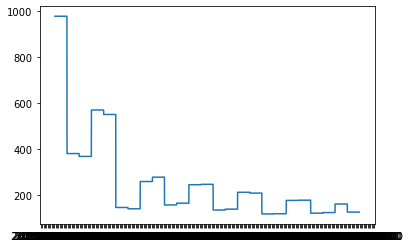

In [5]:
a = Baseload(data_fr_cal_1_markit.to_period("Q").resample("H").ffill()).shape(ratio_quar_cal).data
a.index = a.index.astype(str)
plt.plot(a)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 240))

In [9]:
a = Baseload(data_fr_cal_1_markit.to_period("Q").resample("H").ffill()).shape(ratio_quar_cal).data
a = a.resample("Q").mean()
a.index = a.index.to_timestamp()
a

Start Date
2023-01-01    979.231098
2023-04-01    381.751235
2023-07-01    369.333911
2023-10-01    571.272845
2024-01-01    551.847998
2024-04-01    147.143121
2024-07-01    141.484828
2024-10-01    260.084409
2025-01-01    279.076274
2025-04-01    158.227550
2025-07-01    165.869326
2025-10-01    246.239048
2026-01-01    247.949355
2026-04-01    136.183597
2026-07-01    139.928806
2026-10-01    213.332734
2027-01-01    209.786246
2027-04-01    119.177953
2027-07-01    119.963532
2027-10-01    178.033119
2028-01-01    178.924132
2028-04-01    122.392904
2028-07-01    125.070191
2028-10-01    162.262740
2029-01-01    127.128615
Freq: QS-OCT, Name: Markit, dtype: float64

In [24]:
# maintenant on observe une serie de prix cal, on essaie d'en determiner les prix quarters en utilisant les ratios calcules avec les prix de la veille
# plot du graph 
plt.figure(figsize = (30, 10), dpi = 650)
plt.style.use('seaborn')

#prix recalcule
a = Baseload(data_fr_cal_1_markit.to_period("Q").resample("H").ffill()).shape(ratio_quar_cal).data
a = a.resample("Q").mean()
a.index = a.index.to_timestamp()


plt.plot(a, color = "blue", label = "Prix recalcule")
plt.plot(data_fr_qua_tgp, color = "green", label = "Prix TGP")
plt.plot(data_fr_qua_1_markit, color = "indianred", label = "Prix Markit")
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 240))
plt.title(f"Prix Quarter recalcule vs benchmarck")
plt.xlabel("Maturity")
plt.ylabel("Prix")
plt.xticks(rotation=90)
plt.legend();

In [32]:
a = Baseload(data_fr_qua_1_markit.to_period("D").resample("H").ffill()).shape(ratio_quar_cal).data
a = a.resample("M").mean()
a.index = a.index.to_timestamp()
a

Start Date
2022-10-01     995.271545
2022-11-01     995.271545
2022-12-01     995.271545
2023-01-01    1681.705176
2023-02-01    1681.705176
                 ...     
2029-12-01            NaN
2030-01-01            NaN
2030-02-01            NaN
2030-03-01            NaN
2030-04-01            NaN
Freq: MS, Name: Markit, Length: 91, dtype: float64

In [31]:
data_fr_qua_1_markit.to_period("M")

Start Date
2022-10    995.271545
2023-01    988.171814
2023-04    381.775890
2023-07    366.057174
2023-10    571.623218
2024-01    541.946426
2024-04    150.232582
2024-07    144.350136
2024-10    266.144010
2025-01    283.989280
2025-04    150.376808
2025-07    156.775821
2025-10    262.257562
2026-01    250.986340
2026-04    132.207325
2026-07    135.890146
2026-10    214.702689
2027-01    206.850493
2027-04    117.829427
2027-07    118.716091
2027-10    174.451323
2028-01    176.456897
2028-04    121.002328
2028-07    123.628877
2028-10    160.120106
2029-01           NaN
2029-04           NaN
2029-07           NaN
2029-10           NaN
2030-01           NaN
2030-04           NaN
Freq: M, Name: Markit, dtype: float64

In [33]:
# maintenant on observe une serie de prix cal, on essaie d'en determiner les prix quarters en utilisant les ratios calcules avec les prix de la veille
# plot du graph 
plt.figure(figsize = (30, 10), dpi = 650)
plt.style.use('seaborn')

#prix recalcule
a = Baseload(data_fr_qua_1_markit.to_period("D").resample("H").ffill()).shape(ratio_quar_cal).data
a = a.resample("D").mean()
a.index = a.index.to_timestamp()


plt.plot(a, color = "blue", label = "Prix recalcule")
plt.plot(data_fr_month_1_markit, color = "green", label = "Prix TGP")
plt.plot(data_fr_month_1_tgp, color = "indianred", label = "Prix Markit")
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 240))
plt.title(f"Prix Quarter recalcule vs benchmarck")
plt.xlabel("Maturity")
plt.ylabel("Prix")
plt.xticks(rotation=90)
plt.legend();

TIMELINE               2016      2017      2018      2019
TIMELINE TIMELINE                                        
2016     1         1.515349       NaN       NaN       NaN
         2         1.268523       NaN       NaN       NaN
         3         1.235716       NaN       NaN       NaN
         4         0.917230       NaN       NaN       NaN
2017     1              NaN  0.794155       NaN       NaN
         2              NaN  0.969154       NaN       NaN
         3              NaN  1.155619       NaN       NaN
         4              NaN  0.969582       NaN       NaN
2018     1              NaN       NaN  0.996769       NaN
         2              NaN       NaN  0.894072       NaN
         3              NaN       NaN  0.697119       NaN
         4              NaN       NaN  0.874264       NaN
2019     1              NaN       NaN       NaN  0.924495
         2              NaN       NaN       NaN  0.942173
         3              NaN       NaN       NaN  1.122409
         4    

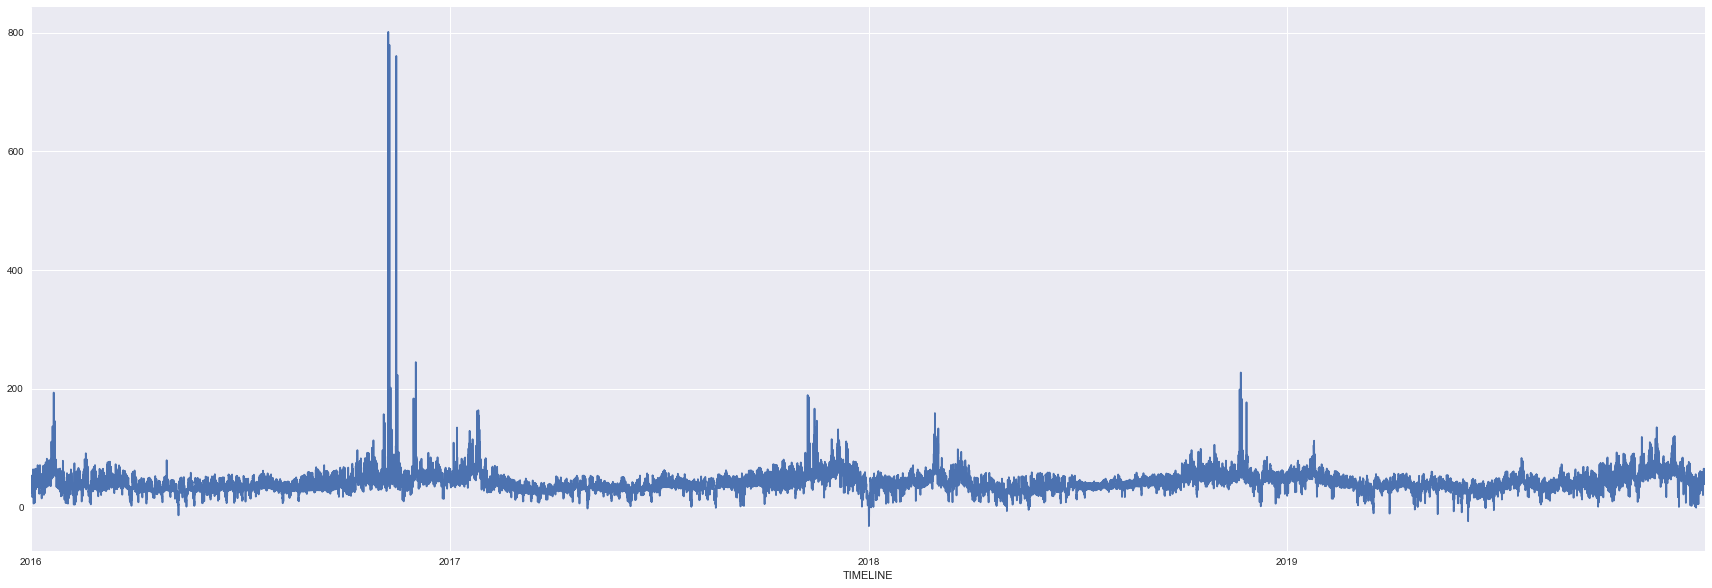

In [ ]:
# First we define a {Baseload}
auction = auctions_kdb()
historical_baseload = Baseload(auction["AUCTION_PRICE"])

# On calcule ici le ratio de prix par annee entre les quarters et les mois 
# Line is Denominator when Column is Nominator
ratio_month_day = Ratio(historical_baseload,  #on peut utiliser les filtres par annees, quarters, mois .filter_(Years([2022,2023,2024])
                        line_scope=[ Scope.YEAR_NUMBER, Scope.QUARTER],
                        column_scope=[Scope.YEAR_NUMBER]) \
    .compute(numerator_computing_scope=[ Scope.MONTH_NUMBER]).evaluate()

print(ratio_month_day.matrix_rate)

plt.figure(figsize = (30, 10))

# Given a pandas timeseries such as `forward_hourly_timeserie`

# First we create a {Baseload} and apply smoothing using {Scope}s.
peak = Peak(auction["AUCTION_PRICE"])#.smooth(IntegralCubicSpline([Scope.YEAR_NUMBER, Scope.MONTH_NUMBER]))

# Second we define the {Peak} based on the `forward_baseload`
# we define it by filtering to get only {Hours} 1 and 3 and the {Weekdays} Saturday.

# Let's shape the peak with the ratio_month_day 
peak.shape(ratio_month_day)

# Plot the peak data
peak.data.plot()
plt.show()
